<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Curve_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

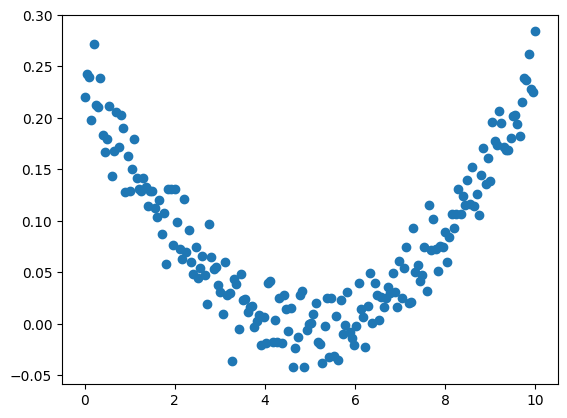

0
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5
[[-0.5837315   0.34442407  0.23481673  0.69949955  0.46161824  0.21969604
  -0.6518814   0.21660787 -0.13297725  0.49010497]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
[[-0.5837315   0.34442407  0.23481673 

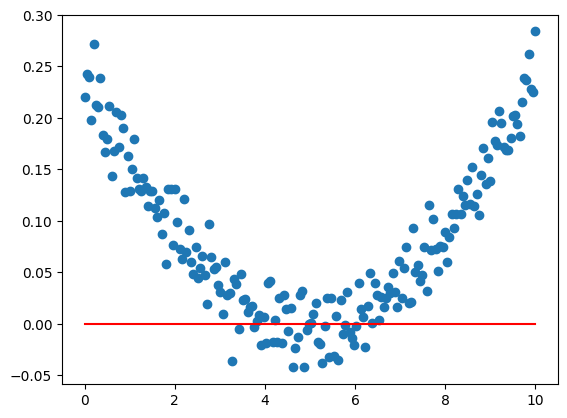

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import numpy
import matplotlib.pyplot as plt

data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.02,data.shape)
y=numpy.square(data/10)+noise
data = data+5


plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.0005)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()
